In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
reviews_dd = pd.read_csv('data/Book_review.csv')

In [3]:
def dim():
  dimensions = len(set(reviews_dd['text'].str.split().explode().values))
  print(f'{dimensions} dimensions in the potential DFM.')
dim()

52779 dimensions in the potential DFM.


In [4]:
# top 20 words 
freq = pd.Series(' '.join(reviews_dd['text']).split()).value_counts()[:20]
freq

the     24650
and     18950
to      15593
a       14378
of      13953
is       9030
I        8732
in       8406
that     6459
for      5206
this     5106
with     4562
was      4321
book     4203
her      4078
it       3785
as       3408
are      3108
but      2754
on       2719
Name: count, dtype: int64

In [5]:
# convert all words into lower cases
reviews_dd['text'] = reviews_dd['text'].str.lower()

In [6]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/danielduque/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
stop = stopwords.words('english')
reviews_dd['text'] = reviews_dd['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [8]:
# top 20 words after removing stop words and making all words lower case
freq = pd.Series(' '.join(reviews_dd['text']).split()).value_counts()[:20]
freq
dim()

48355 dimensions in the potential DFM.


In [9]:
# remove punctuation
reviews_dd['text'] = reviews_dd['text'].str.replace(r'[^\w\s]+', '',regex=True)
dim()

30576 dimensions in the potential DFM.


In [10]:
# perform stremming
from nltk.stem import PorterStemmer
st = PorterStemmer()
reviews_dd['text'] = reviews_dd['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
dim()

21924 dimensions in the potential DFM.


In [11]:
# check top words
freq = pd.Series(' '.join(reviews_dd['text']).split()).value_counts()[:20]
freq

book       6546
read       2826
stori      2290
one        2134
love       1690
like       1661
time       1541
charact    1322
life       1218
make       1178
get        1119
author     1115
would      1056
well        985
also        967
way         963
it          953
first       943
famili      920
want        891
Name: count, dtype: int64

In [12]:
stop += ['make','get','would','well','also','way','it','first','want']
reviews_dd['text'] = reviews_dd['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [13]:
# check top words
freq = pd.Series(' '.join(reviews_dd['text']).split()).value_counts()[:20]
freq

book       6546
read       2826
stori      2290
one        2134
love       1690
like       1661
time       1541
charact    1322
life       1218
author     1115
famili      920
realli      875
mani        867
find        863
good        859
enjoy       851
much        842
seri        832
go          825
work        824
Name: count, dtype: int64

In [14]:
from wordcloud import WordCloud
comment_words = str(' '.join(reviews_dd['text']).split())

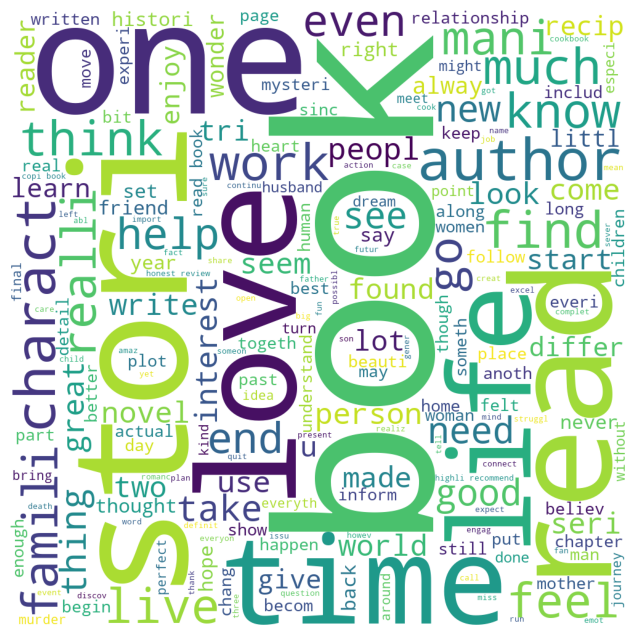

In [15]:
import string
comment_words = comment_words.translate(str.maketrans('','',string.punctuation))
wordcloud = WordCloud(background_color='white',
max_words=200,
width=1000,height=1000,
).generate(comment_words)
plt.figure(figsize=(8,8))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [16]:
doc_complete = reviews_dd.text
doc_complete

0       bought book sincer attempt understand anyon ad...
1       read experi probabl deserv 4 star cruelli dedu...
2       seraphina arden wellknown scandal view equal p...
3       great book featur two wellwritten teenag main ...
4       book lot interest thing genet schizophrenia po...
                              ...                        
2803    book phenomen brilliantli written watch mauric...
2804    charact wonder stori realli drew joy go along ...
2805    second book compani love one beauti floral the...
2806    met lesli blodgett year ago grew love bare min...
2807    attract book long publish alkalin water machin...
Name: text, Length: 2808, dtype: object

In [17]:
# tokenize each review
corpus = [doc.split() for doc in doc_complete]
corpus

[['bought',
  'book',
  'sincer',
  'attempt',
  'understand',
  'anyon',
  'advoc',
  'social',
  'got',
  'descript',
  'problem',
  'follow',
  'bunch',
  'histori',
  'follow',
  'playbook',
  'launch',
  'socialist',
  'agenda',
  'lack',
  'connect',
  'social',
  'fact',
  'solv',
  'problem',
  'note',
  'start',
  'bookso',
  'problem',
  'author',
  'see',
  'live',
  'system',
  'exploit',
  'work',
  'peopl',
  'result',
  'class',
  'unfairli',
  'better',
  'everyon',
  'els',
  'grind',
  'thru',
  'life',
  'paycheck',
  'paycheck',
  'littl',
  'protect',
  'calam',
  'author',
  'state',
  'proof',
  'live',
  'social',
  'thing',
  'fair',
  'peopl',
  'better',
  'offw',
  'go',
  '6',
  'chapter',
  'recount',
  'histor',
  'movement',
  'time',
  'period',
  'variou',
  'form',
  'social',
  'partial',
  'fulli',
  'implement',
  'author',
  'give',
  'decent',
  'retel',
  'point',
  'good',
  'bad',
  'yet',
  'chapter',
  'found',
  'mani',
  'nuanc',
  'bia',


In [18]:
import gensim
from gensim import corpora, models

In [19]:
dictionary = corpora.Dictionary(corpus)

In [20]:
from gensim.models import word2vec
modeldd = word2vec.Word2Vec(corpus, min_count=20,workers=3,window=3,sg=1)

In [21]:
modeldd.wv.most_similar('author',topn=6)

[('memoir', 0.8528016209602356),
 ('lesli', 0.8521674871444702),
 ('format', 0.844494640827179),
 ('storytel', 0.8416281342506409),
 ('highlight', 0.8401315808296204),
 ('materi', 0.8358715772628784)]

In [24]:
# stori is the root word for story
modeldd.wv.most_similar('stori',topn=6)

[('moment', 0.7840432524681091),
 ('engag', 0.7744585871696472),
 ('humor', 0.7731550931930542),
 ('novel', 0.7651494145393372),
 ('satisfi', 0.7648422122001648),
 ('element', 0.7623232007026672)]

In [25]:
DFM = [dictionary.doc2bow(doc) for doc in corpus]
DFM

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 2),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 2),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 3),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 4),
  (38, 1),
  (39, 7),
  (40, 1),
  (41, 3),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 3),
  (47, 3),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 3),
  (52, 3),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 3),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 3),
  (66, 1),
  (67, 2),
  (68, 4),
  (69, 4),
  (70, 2),
  (71, 1),
  (72, 1),
  (73, 3),
  (74, 4),
  (75, 2),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 2),
  (80, 4),
  (81, 1),
  (82, 1),
  (83, 2),
  (84, 1),
  (85, 1),
  (86, 3),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1)

In [30]:
n_topics= n_topics=5
ldamodel = models.LdaModel(DFM,num_topics=n_topics,id2word=dictionary,passes=40)

In [31]:
import pyLDAvis
pyLDAvis.enable_notebook()
import pyLDAvis.gensim_models
vis = pyLDAvis.gensim_models.prepare(ldamodel,DFM,dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.135473  0.032856       1        1  46.277111
0      0.127824  0.018301       2        1  29.913931
2      0.003118  0.111425       3        1  14.494154
3     -0.004314 -0.192992       4        1   5.991639
4     -0.262101  0.030410       5        1   3.323165, topic_info=           Term         Freq        Total Category  logprob  loglift
52         book  6458.000000  6458.000000  Default  30.0000  30.0000
3834      recip   384.000000   384.000000  Default  29.0000  29.0000
727     charact  1315.000000  1315.000000  Default  28.0000  28.0000
803        love  1687.000000  1687.000000  Default  27.0000  27.0000
388         use   515.000000   515.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
5118  grandfath    14.581733    24.131234   Topic5  -6.4233   2.9005
244      murder    16.804530   260.281705   Topic5  -6.2814   0.6641
7268       jane    15.572877    79.071478   Topic5  -6.3575   1.7794
400        work    16.196053   733.676924   Topic5  -6.3183  -0.4090
2771      rescu    15.119599    66.095679   Topic5  -6.3871   1.9291

[386 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
1357       2  0.948800  advic
1357       3  0.012822  advic
1357       4  0.038465  advic
10873      5  0.931104  adwel
1233       2  0.966215  album
...      ...       ...    ...
405        5  0.013258   year
2132       1  0.549778  young
2132       2  0.258719  young
2132       3  0.119657  young
2132       5  0.071148  young

[744 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4, 5])